## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Exploration

Read the .csv file and store it in a Pandas dataframe

In [23]:
df = pd.read_csv('/content/drive/MyDrive/Python Projects/Day 73/QueryResults.csv', names=["date", "tag", "post"], header=0)

Examine the first 5 rows and the last 5 rows of the of the dataframe

In [24]:
df.head()

,date,tag,post
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [25]:
df.tail()

,date,tag,post
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [26]:
df.shape

(1991, 3)

Count the number of entries in each column of the dataframe

In [27]:
df.count()


,0
date,1991
tag,1991
post,1991


Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [28]:
language_counts = df.groupby('tag')['post'].sum()
print(language_counts)

tag
assembly        34852
c              336042
c#            1423530
c++            684210
delphi          46212
go              47499
java          1696403
javascript    2056510
perl            65286
php           1361988
python        1496210
r              356799
ruby           214582
swift          273055
Name: post, dtype: int64


In [29]:
highest_post_language = language_counts.idxmax()
print(f"\nThe programming language with the highest total number of posts is: {highest_post_language}")


The programming language with the highest total number of posts is: javascript


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

How many months of data exist per language? Which language had the fewest months with an entry?


In [30]:
monthly_counts = df.groupby('tag')['date'].count()
print(monthly_counts)

fewest_months_language = monthly_counts.idxmin()
print(f"\nThe language with the fewest months with an entry is: {fewest_months_language}")

tag
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
Name: date, dtype: int64

The language with the fewest months with an entry is: go


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [31]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.head()

,date,tag,post
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [33]:
pivoted_df = df.pivot(index='date', columns='tag', values='post')

What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [34]:
pivoted_df.head()

tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [35]:
pivoted_df.shape

(145, 14)

Count the number of entries per programming language. Why might the number of entries be different?

In [36]:
pivoted_df.count()

,0
tag,
assembly,144
c,144
c#,145
c++,144
delphi,144
go,129
java,144
javascript,144
perl,144


When we count the number of entries per column we see that not all languages are the same. The reason is that the .count() method excludes NaN values. When we pivoted the DataFrame the NaN values were inserted when there were no posts for a language in that month (e.g., Swift in July, 2008).

In [38]:
pivoted_df.fillna(0, inplace=True)
pivoted_df.head()

tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


## Data Visualisaton with with Matplotlib


Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

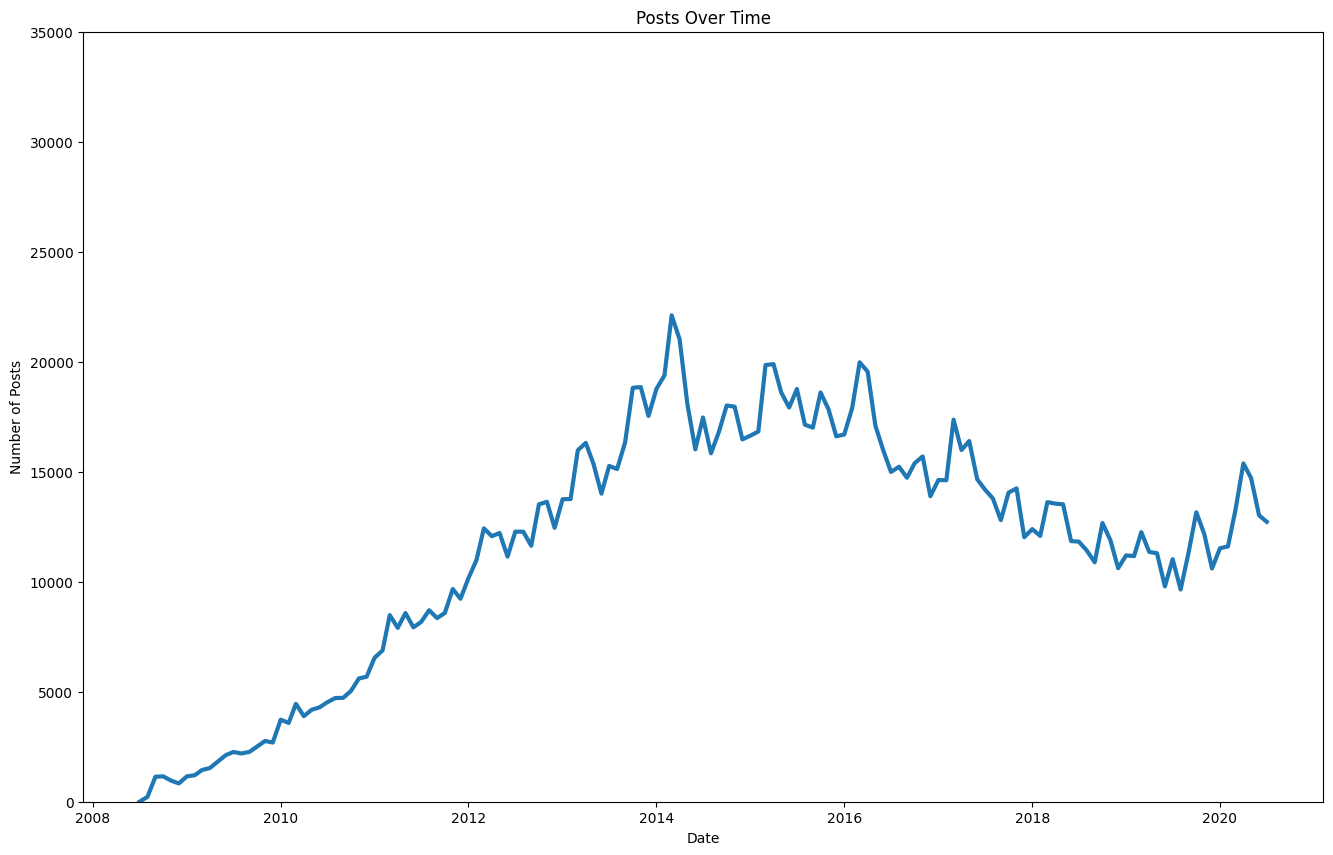

In [50]:
plt.figure(figsize=(16, 10))
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Posts Over Time')
plt.ylim(0, 35000)

plt.plot(pivoted_df.index, pivoted_df['java'],
         linewidth=3, label=pivoted_df['java'].name)

Show two line (e.g. for Java and Python) on the same chart.

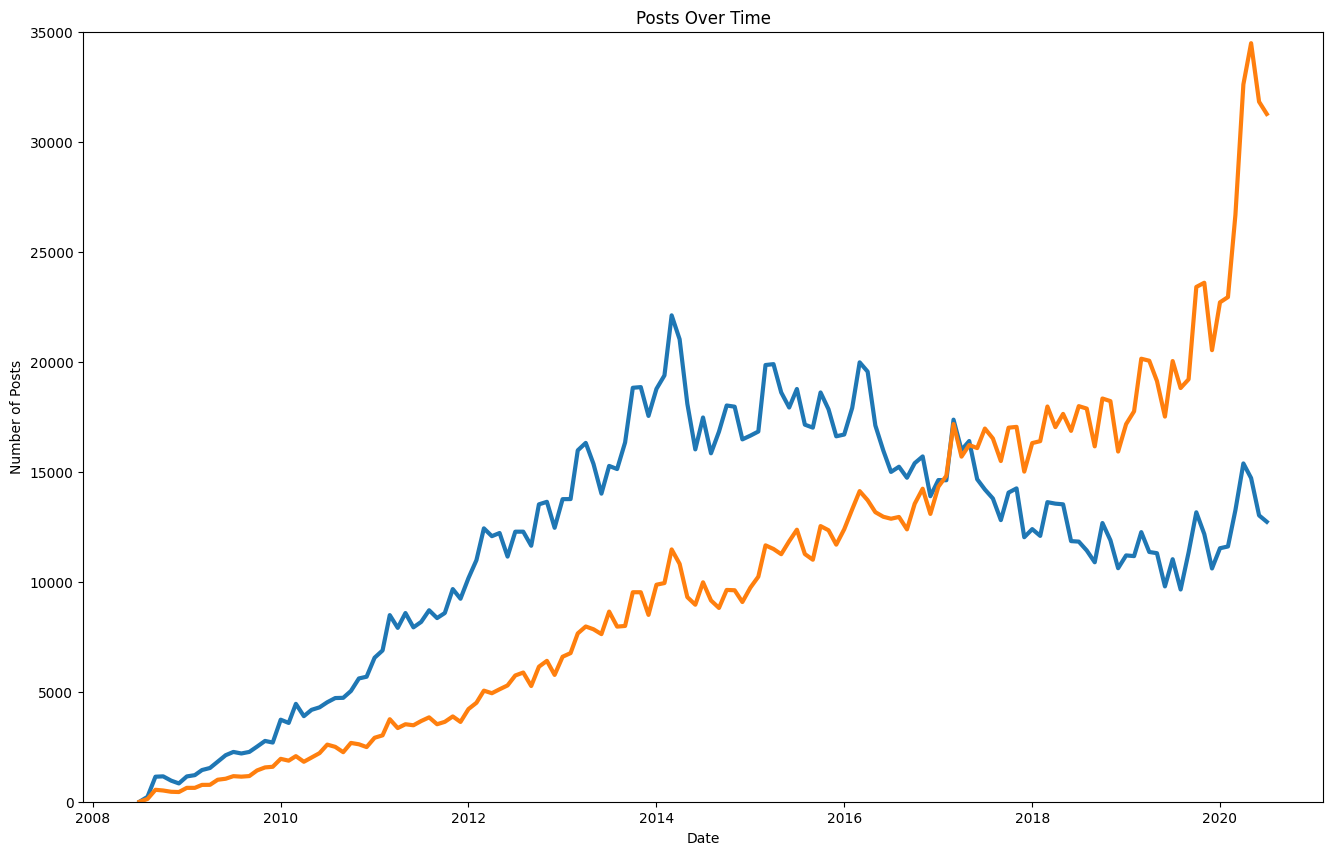

In [51]:
plt.figure(figsize=(16, 10))
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Posts Over Time')
plt.ylim(0, 35000)

plt.plot(pivoted_df.index, pivoted_df['java'],
         linewidth=3, label=pivoted_df['java'].name)

plt.plot(pivoted_df.index, pivoted_df['python'],
         linewidth=3, label=pivoted_df['python'].name)

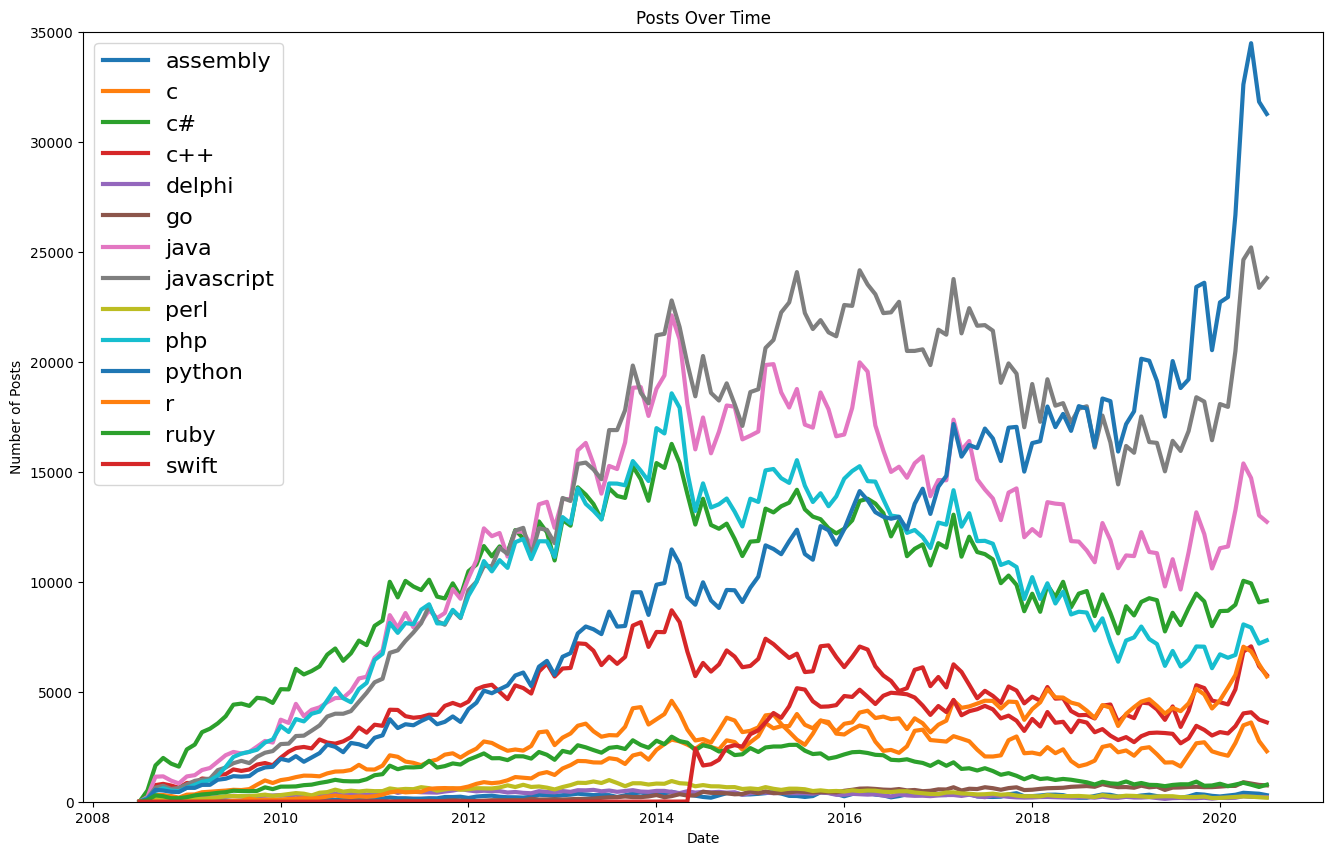

In [49]:
plt.figure(figsize=(16, 10))
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Posts Over Time')
plt.ylim(0, 35000)

for column in pivoted_df.columns:
    plt.plot(pivoted_df.index, pivoted_df[column],
             linewidth=3, label=pivoted_df[column].name)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

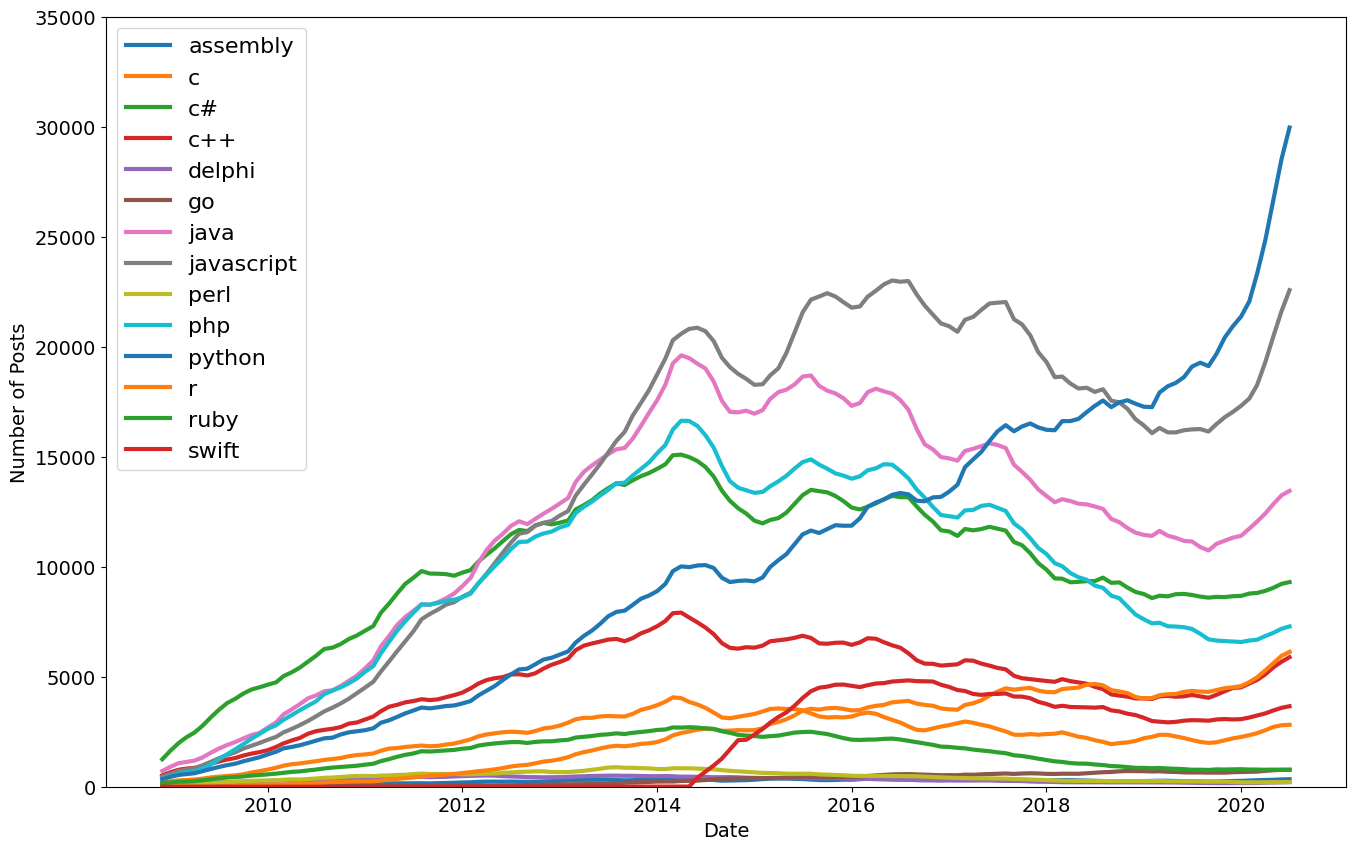

In [52]:
# The window is number of observations that are averaged
roll_df = pivoted_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)